# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sun Jun 16 17:36:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# Медицина, военная техника, производственные процессы

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# 1. Early stopping. Early stopping pauses the training phase before the machine learning model learns the noise in the data.
# 2. Pruning. Feature selection or pruning identifies the most important features within the training set and eliminates irrelevant ones.
# 3. Regularization. Regularization is a collection of training/optimization techniques that seek to reduce overfitting

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms

train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor(),
                            target_transform=None)

test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

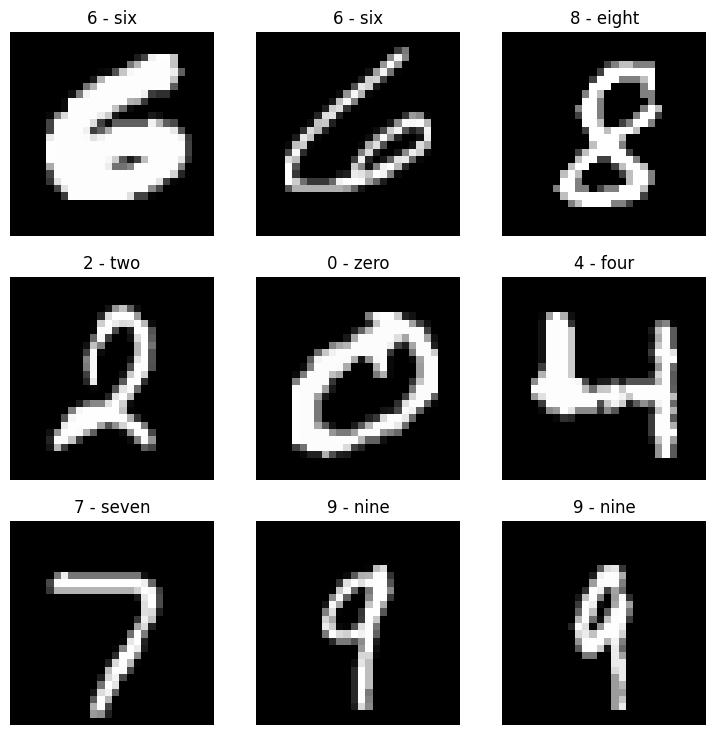

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f5ea05cbeb0>, <torch.utils.data.dataloader.DataLoader object at 0x7f5ea05cb640>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1
                      ),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )

        self.layer_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
        )

  def forward(self, x: torch.Tensor):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = MNISTModelV0(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names))
model_0

MNISTModelV0(
  (layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accurancy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    model.train()

    # Forward pass
    y_pred = model(X)

    # Calculate loss and other statistics
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accurancy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accurancy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)

  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      test_pred = model(X)

      # Calculate loss and other statistics
      test_loss += loss_fn(test_pred, y)
      test_acc += accurancy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [ ]:
# Define a loss function an optimizer and an accurancy function (imported)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

import requests
from pathlib import Path

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = device):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
train_time_start_on_gpu = timer()

torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
gpu_time = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.32097 | Train accuracy: 89.22%
Test loss: 0.07203 | Test accuracy: 97.81%
Epoch: 1
-------
Train loss: 0.08226 | Train accuracy: 97.45%
Test loss: 0.06599 | Test accuracy: 97.85%
Epoch: 2
-------
Train loss: 0.06449 | Train accuracy: 98.01%
Test loss: 0.05650 | Test accuracy: 98.10%
Train time on cuda: 37.643 seconds


In [ ]:
train_time_start_on_cpu = timer()

torch.manual_seed(42)

epochs = 0

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device = 'cpu')

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device = 'cpu')

train_time_end_on_cpu = timer()
cpu_time = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu)

0it [00:00, ?it/s]

Train time on cuda: 0.019 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
images = []
real_labels = []

for i in torch.randint(0, len(test_data)-1, (16,)):
  image = test_data[i.item()][0]
  label = test_data[i.item()][1]

  images.append(image)
  real_labels.append(label)

images = torch.stack(images)
real_labels = torch.tensor(real_labels)

real_labels

tensor([7, 9, 3, 5, 6, 7, 2, 8, 7, 2, 9, 2, 5, 8, 1, 9])

In [ ]:
def make_predictions(model:nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []

  model.eval()
  with torch.inference_mode():

    for sample in data:

      sample = sample.unsqueeze(dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [ ]:
pred_probs = make_predictions(model_0, images)
pred_probs[:4]

tensor([[2.0550e-10, 1.2336e-07, 9.9198e-04, 8.2254e-05, 8.9690e-13, 2.0667e-10,
         4.1210e-16, 9.9892e-01, 6.5688e-07, 7.1288e-07],
        [7.1276e-07, 1.8669e-09, 1.3652e-07, 3.0565e-06, 8.6879e-06, 3.1338e-06,
         1.2671e-09, 8.9005e-08, 1.1149e-06, 9.9998e-01],
        [2.0843e-12, 5.0958e-08, 4.6862e-08, 1.0000e+00, 2.0196e-10, 1.8594e-07,
         3.8837e-16, 1.3283e-07, 7.4264e-08, 3.4080e-06],
        [8.5358e-12, 5.3475e-11, 5.7776e-12, 3.9111e-04, 4.5602e-10, 9.9960e-01,
         7.9195e-09, 1.4640e-11, 5.9023e-06, 2.8996e-06]], device='cuda:0')

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 3, 5, 6, 7, 2, 8, 7, 2, 9, 2, 5, 8, 1, 9], device='cuda:0')

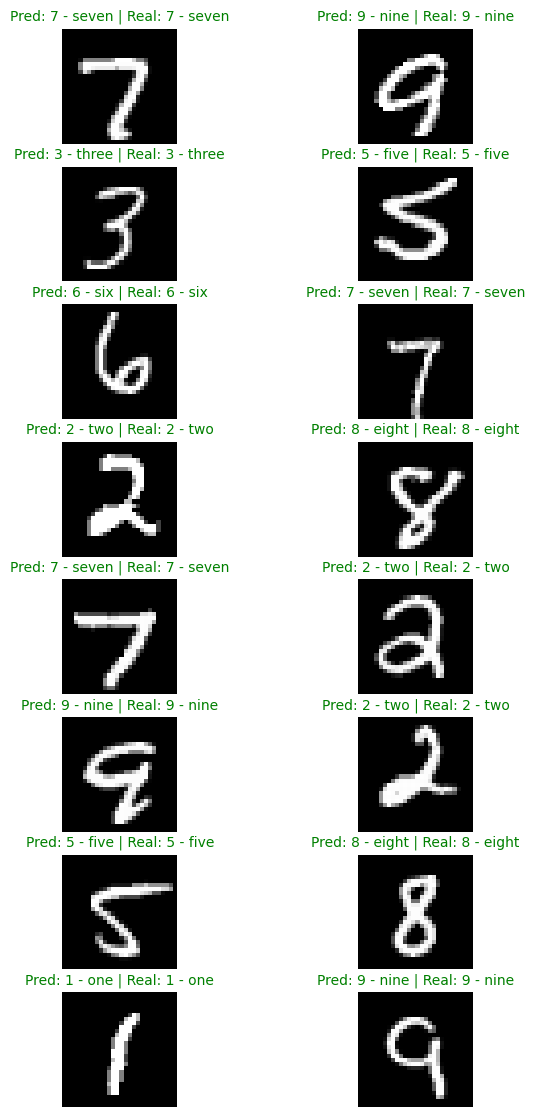

In [ ]:
plt.figure(figsize=(7,14))
nrows = 8
ncols = 2
for i, image in enumerate(images):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(image.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  real_label = class_names[real_labels[i]]
  title_text = f"Pred: {pred_label} | Real: {real_label}"
  if pred_label == real_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
pred_probs = []
real_labels = []
for (X,y) in test_dataloader:
  pred_probs+=make_predictions(model_0, X)
  real_labels+=y

pred_probs = torch.stack(pred_probs)
pred_labels = pred_probs.argmax(dim=1)
real_labels = torch.tensor(real_labels)

In [ ]:
!pip install -q torchmetrics -U mlxtend
import torchmetrics, mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 33.4 MB/s eta 0:00:00


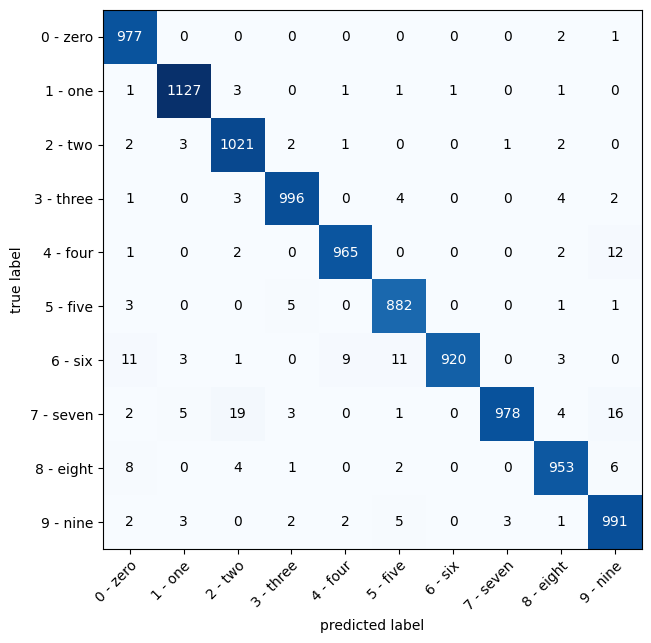

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds = pred_labels.cpu(),
                         target = real_labels.cpu())

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random = torch.rand(size = (1,3,64,64))
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 62,
                       stride = 2)

random_conv = conv_layer(random)
random_conv.shape

torch.Size([1, 10, 2, 2])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
from torchvision import transforms

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9968007.52it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135553.47it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1125259.10it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23727776.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
from tqdm.auto import tqdm

train_time_start_on_gpu = timer()

torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
gpu_time = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.50227 | Train accuracy: 82.02%
Test loss: 0.39293 | Test accuracy: 85.74%
Epoch: 1
-------
Train loss: 0.35775 | Train accuracy: 87.27%
Test loss: 0.36202 | Test accuracy: 86.91%
Epoch: 2
-------
Train loss: 0.32564 | Train accuracy: 88.27%
Test loss: 0.34028 | Test accuracy: 87.72%
Epoch: 3
-------
Train loss: 0.30851 | Train accuracy: 88.81%
Test loss: 0.31493 | Test accuracy: 88.75%
Epoch: 4
-------
Train loss: 0.29726 | Train accuracy: 89.19%
Test loss: 0.32542 | Test accuracy: 88.40%
Train time on cuda: 62.369 seconds


In [ ]:
pred_probs = []
real_labels = []
for (X,y) in test_dataloader:
  pred_probs+=make_predictions(model_0, X)
  real_labels+=y

pred_probs = torch.stack(pred_probs)
pred_labels = pred_probs.argmax(dim=1)
real_labels = torch.tensor(real_labels)

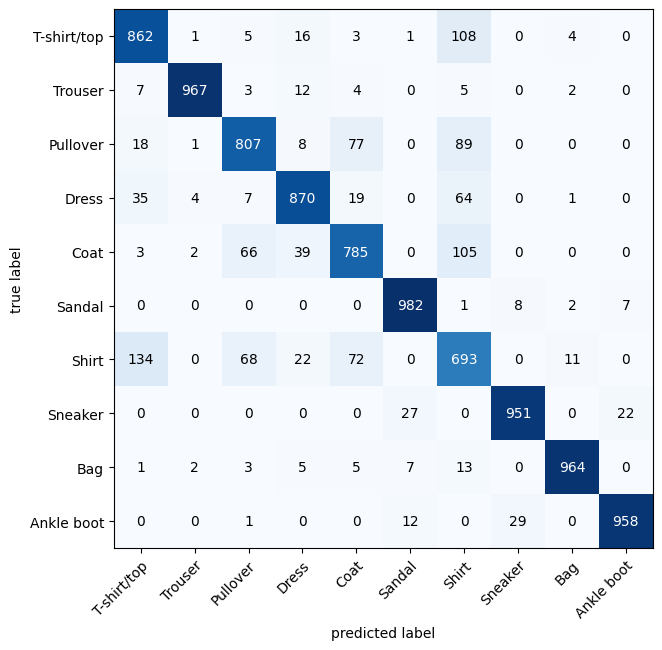

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds = pred_labels.cpu(),
                         target = real_labels.cpu())

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10,7))